In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('TMKOC_Episode.csv')
df.head()

,Unnamed: 0,episode_number,Episode_title,description,Episode_runtime,Released_on
0,0,1,Taarak Mehta Introduces Himself And Society Me...,Taarak Mehta introduces himself and the societ...,21 mins,28 Jul 2008
1,1,2,Jethalal's Son Tapu Decides To Spend His Holiday,Jethalal's son Tapu decides to spend his holid...,18 mins,29 Jul 2008
2,2,3,Tapu Has Been The Worry Of Jethalal,"More than the society members, Tapu has been t...",19 mins,30 Jul 2008
3,3,4,Daya Approaches Taarak Mehta For Help,Tapu lands Jethalal Gada into yet another trou...,18 mins,31 Jul 2008
4,4,5,Jethalal In Huge Trouble,Tapu has decided to take full revenge from his...,18 mins,01 Aug 2008


Episode Analysis

In [4]:
df['Episode_runtime'] = df['Episode_runtime'].str.replace(' mins', '').astype(int)

ValueError: invalid literal for int() with base 10: 'FULL_HD119'

Cleaning episode runtime

In [5]:
unique_values = df['Episode_runtime'].unique()

In [6]:
unique_values

array(['21 mins', '18 mins', '19 mins', '16 mins', '20 mins', '17 mins',
       '14 mins', '37 mins', '36 mins', 'FULL_HD119 mins',
       'FULL_HD120 mins', 'FULL_HD140 mins', '38 mins', 'FULL_HD121 mins',
       '22 mins', '23 mins', '27 mins', '41 mins', 'FULL_HD117 mins',
       'FULL_HD118 mins', '39 mins', '15 mins', '44 mins', '40 mins',
       '45 mins', '42 mins', '43 mins', '29 mins', '30 mins', '31 mins',
       'FULL_HD122 mins'], dtype=object)

In [8]:
def extract_numeric_runtime(runtime_str):
    try:
        runtime = ''.join(filter(str.isdigit, runtime_str))
        return int(runtime) if runtime else np.nan
    except:
        return np.nan

In [9]:
df['Episode_runtime'] = df['Episode_runtime'].apply(extract_numeric_runtime)

In [10]:
df = df.dropna(subset=['Episode_runtime'])

In [11]:
df['Episode_runtime'] = df['Episode_runtime'].astype(int)

In [14]:
df['Episode_runtime'].head()

#cleaned

0    21
1    18
2    19
3    18
4    18
Name: Episode_runtime, dtype: int32

In [16]:
total_episodes = df['episode_number'].max()
average_runtime = df['Episode_runtime'].mean()

In [19]:
print(f"Total Episodes: {total_episodes}")
print(f"Average Runtime of Episodes: {average_runtime:.2f}")

Total Episodes: 4100
Average Runtime of Episodes: 22.13


c:\Users\manth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


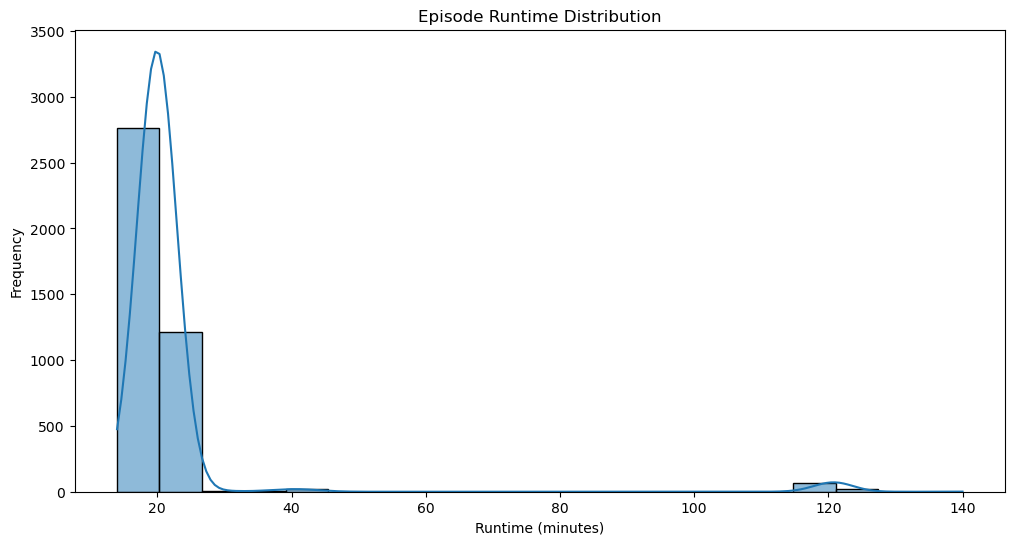

In [20]:
# runtime distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Episode_runtime'], bins=20, kde=True)
plt.title('Episode Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Release data analysis

df['Released_on'] = pd.to_datetime(df['Released_on'])
df['Year'] = df['Released_on'].dt.year
episodes_per_year = df.groupby('Year').size()

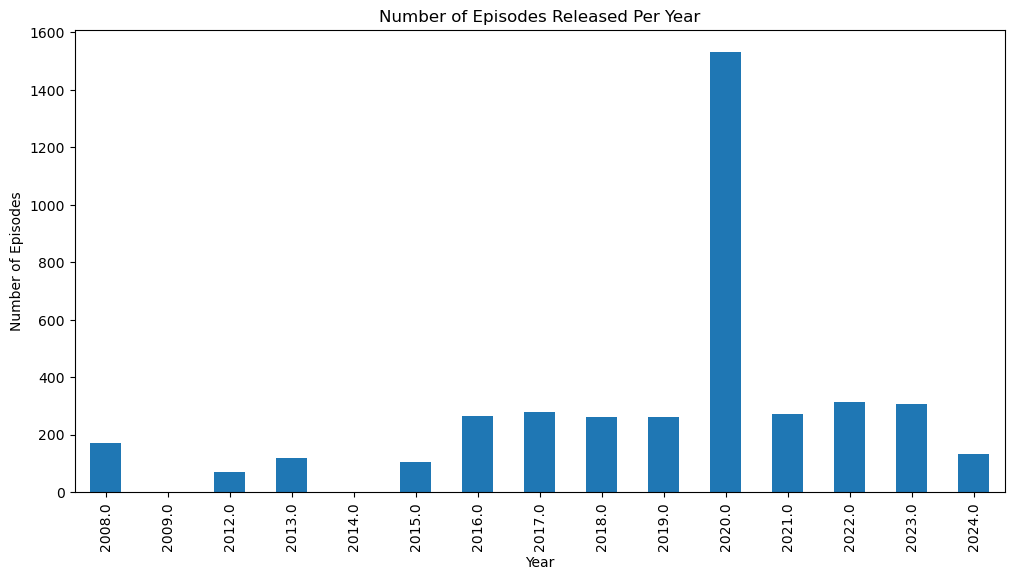

In [22]:
plt.figure(figsize=(12, 6))
episodes_per_year.plot(kind='bar')
plt.title('Number of Episodes Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Episodes')
plt.show()

Analysing Trends and Patterns

In [24]:
df['Released_on'] = pd.to_datetime(df['Released_on'])

In [25]:
df['Year'] = df['Released_on'].dt.year
df['Month'] = df['Released_on'].dt.to_period('M')

In [27]:
episodes_per_year = df.groupby('Year').size()

In [29]:
episodes_per_month = df.groupby('Month').size()

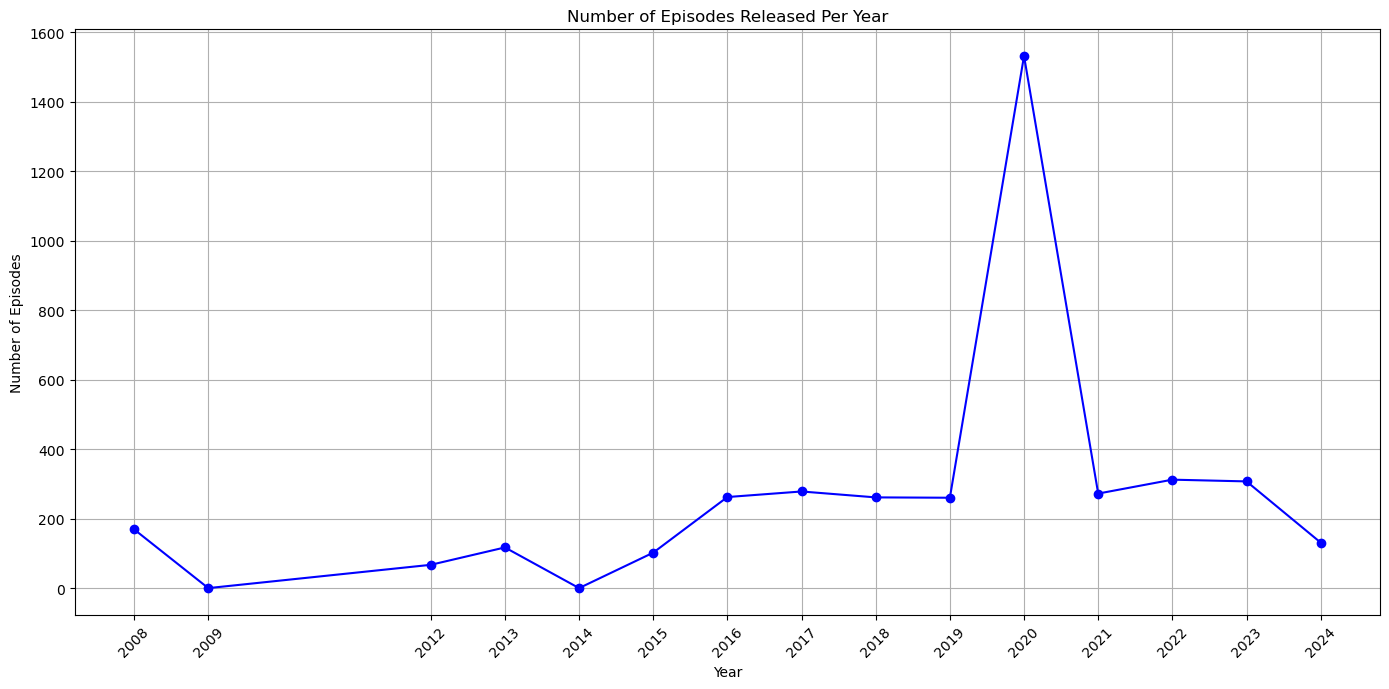

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(episodes_per_year.index, episodes_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Episodes Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Episodes')
plt.grid(True)
plt.xticks(episodes_per_year.index, rotation=45)
plt.tight_layout()
plt.show()

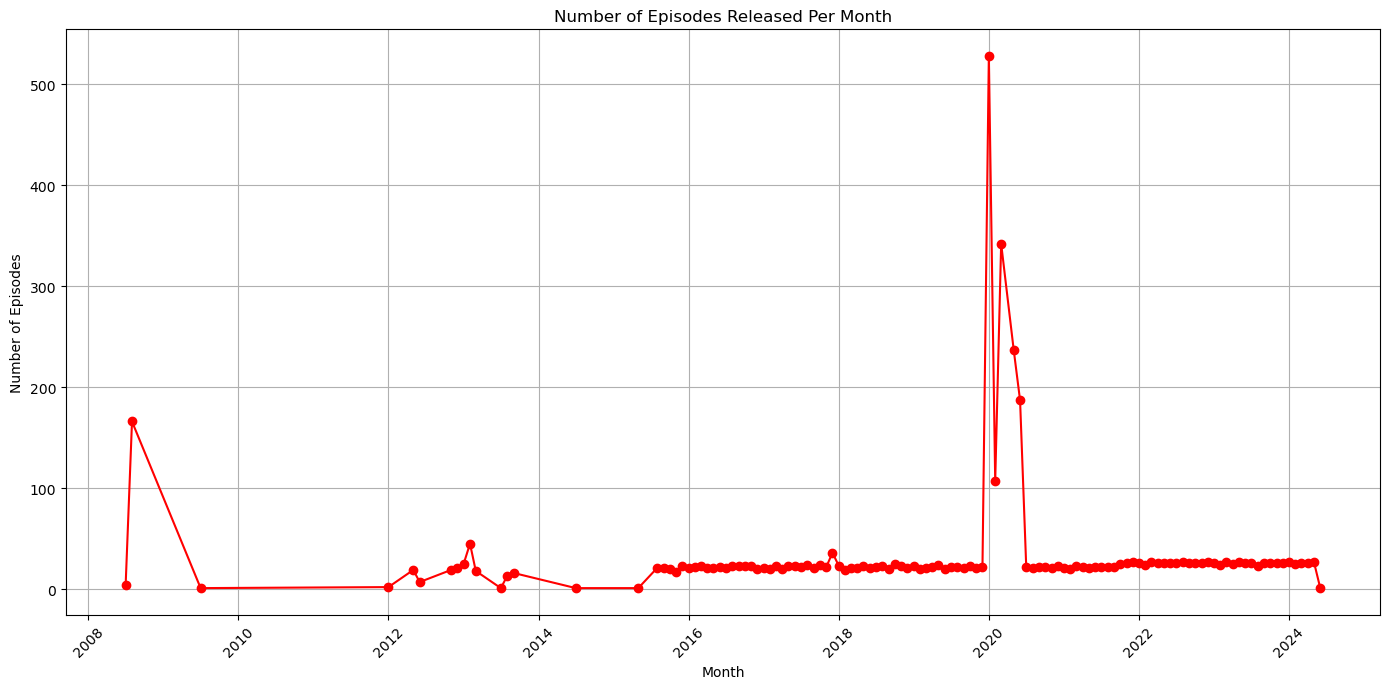

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(episodes_per_month.index.to_timestamp(), episodes_per_month.values, marker='o', linestyle='-', color='r')
plt.title('Number of Episodes Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
window_size = 12  
episodes_per_month_ma = episodes_per_month.rolling(window=window_size).mean()

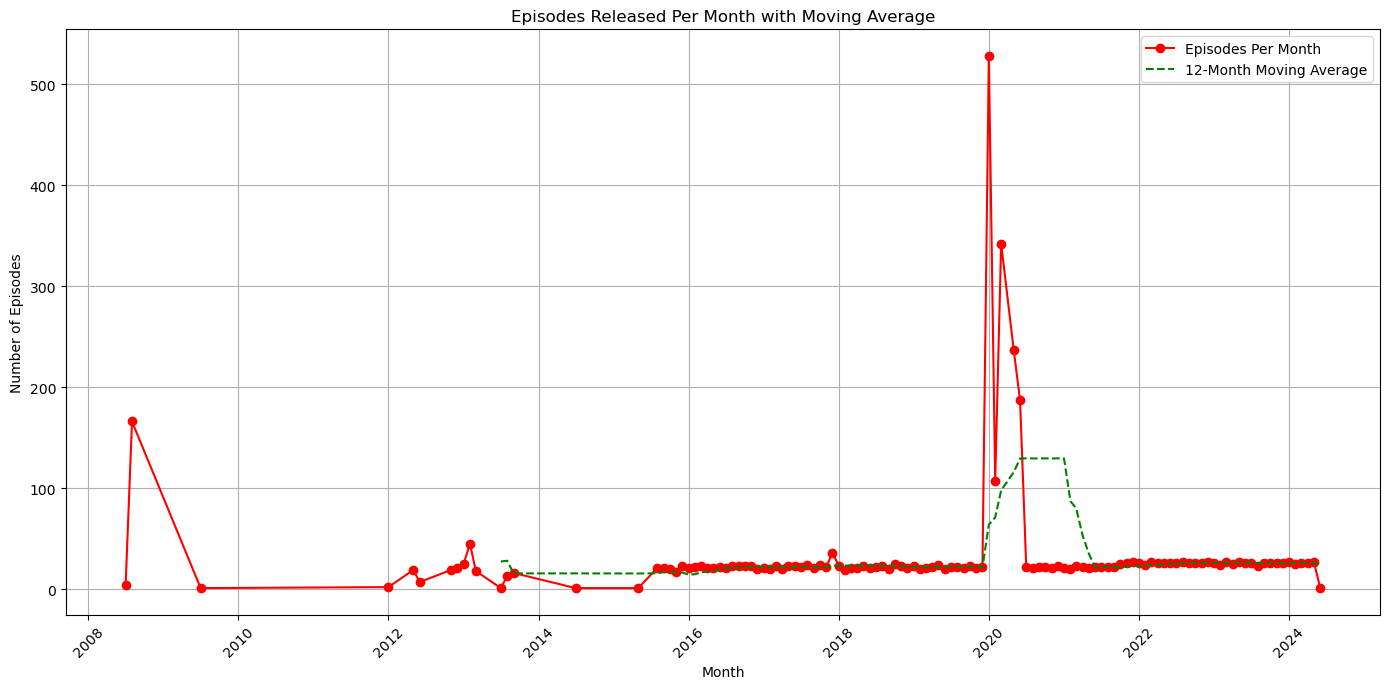

In [34]:

plt.figure(figsize=(14, 7))
plt.plot(episodes_per_month.index.to_timestamp(), episodes_per_month.values, marker='o', linestyle='-', color='r', label='Episodes Per Month')
plt.plot(episodes_per_month_ma.index.to_timestamp(), episodes_per_month_ma.values, linestyle='--', color='g', label=f'{window_size}-Month Moving Average')
plt.title('Episodes Released Per Month with Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Episodes')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NLP

In [35]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import download

In [36]:
download('punkt')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manth\AppData\Roaming\nltk_data...


True

In [37]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [38]:
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(tokens)

In [39]:
df['Processed_Title'] = df['Episode_title'].apply(preprocess_text)
df['Processed_Description'] = df['description'].apply(preprocess_text)

In [41]:
from collections import Counter
from wordcloud import WordCloud

In [42]:
all_titles = ' '.join(df['Processed_Title'])
all_descriptions = ' '.join(df['Processed_Description'])

In [45]:
title_words = all_titles.split()
description_words = all_descriptions.split()
title_freq = Counter(title_words)
description_freq = Counter(description_words)

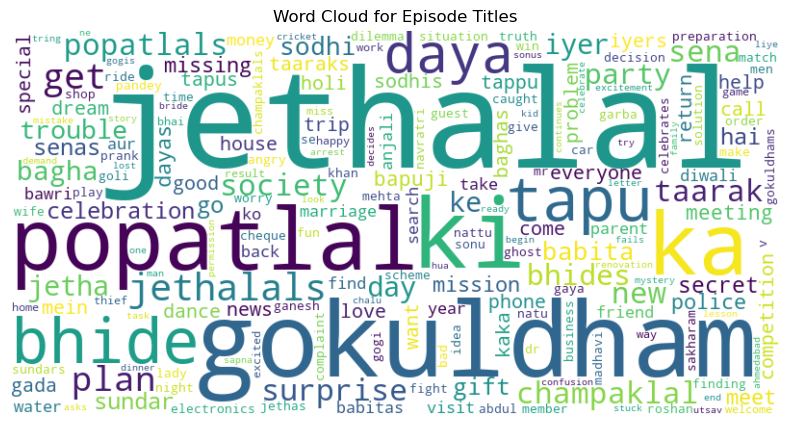

In [46]:
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Word Cloud for Episode Titles')
plt.axis('off')
plt.show()

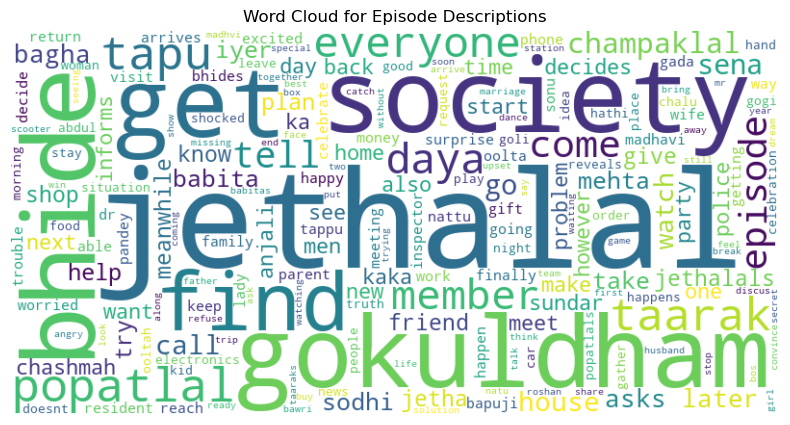

In [47]:
wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(description_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.title('Word Cloud for Episode Descriptions')
plt.axis('off')
plt.show()

In [49]:
# sentimental analysis

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [50]:
df['Sentiment'] = df['description'].apply(get_sentiment)

In [52]:
sentiment_counts = df['Sentiment'].value_counts()

In [53]:
sentiment_counts

Sentiment
Positive    1995
Negative    1238
Neutral      862
Name: count, dtype: int64

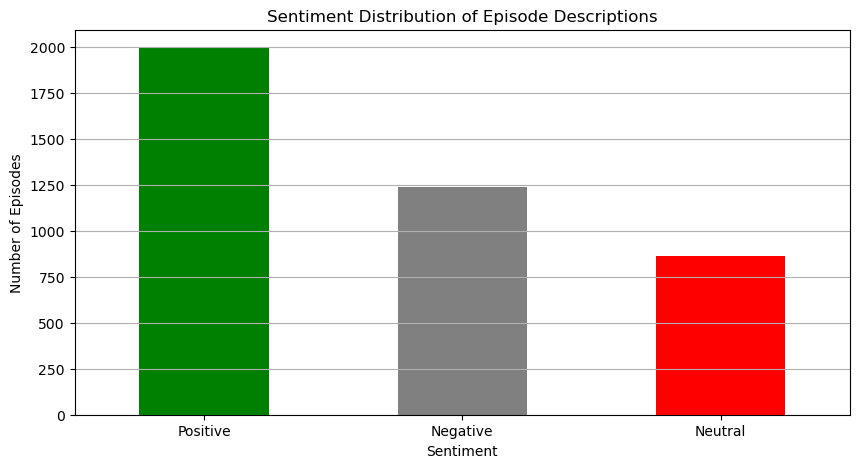

In [54]:
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Episode Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Processed_Description'])

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f'Topic {index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()


Topic 1:
['marriage', 'tell', 'babita', 'popatlals', 'house', 'iyer', 'society', 'bhide', 'gokuldham', 'popatlal']

Topic 2:
['asks', 'taarak', 'come', 'tell', 'kaka', 'shop', 'bhide', 'bagha', 'daya', 'jethalal']

Topic 3:
['popatlal', 'come', 'jethalal', 'day', 'bhide', 'member', 'sena', 'gokuldham', 'society', 'tapu']

Topic 4:
['ka', 'watch', 'sodhi', 'gokuldham', 'episode', 'society', 'bhide', 'mehta', 'jethalal', 'taarak']

Topic 5:
['chalu', 'champaklal', 'member', 'bhide', 'inspector', 'pandey', 'society', 'police', 'gokuldham', 'jethalal']

